In [2]:
################################################
#
#   CORRELATION AND LEAST SQUARE REGRESSION
#
#
from IPython.display import Image
from IPython.core.display import HTML 
from scipy.stats import binom
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
ds1_file = "Datasets/heights_fathers_vs_sons.txt"

In [3]:
df1 = pd.read_csv(ds1_file,sep='\t')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


Average Fathers Height: 67.68682745825602
Average Fathers Height: 68.68423005565863
The standard deviationof the Heights for the fathers is: 2.745827077877219
The standard deviation of the Heights for the fathers is: 2.8161940362006694


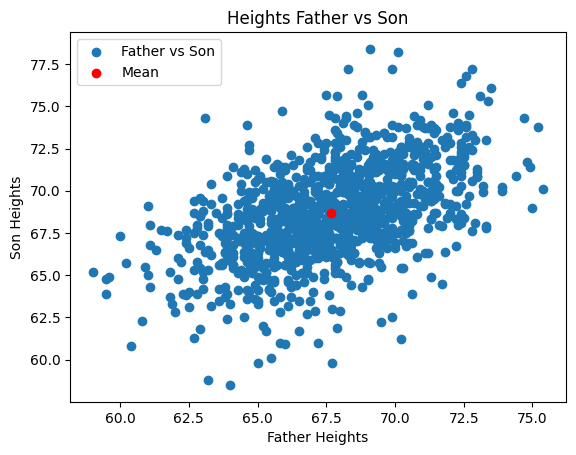

<Figure size 1000x1000 with 0 Axes>

In [12]:
x_values = df1['Father']
y_values = df1['Son']
x_mean = x_values.mean()
y_mean = y_values.mean()
fig, ax = plt.subplots()
ax.scatter(x_values,y_values)
plt.title("Heights Father vs Son")
plt.xlabel("Father Heights")
plt.ylabel("Son Heights")
plt.figure(figsize=(10,10))
print(f"Average Fathers Height: {x_mean}")
print(f"Average Fathers Height: {y_mean}")
print(f"The standard deviationof the Heights for the fathers is: {x_values.std()}")
print(f"The standard deviation of the Heights for the fathers is: {y_values.std()}")
ax.scatter([x_mean],[y_mean],color='red')
ax.legend(['Father vs Son', 'Mean'])
plt.show()

In [13]:
#
# The (Pearson's) correlation coefficient 
from scipy.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats._stats_py:

pearsonr(x, y, *, alternative='two-sided', method=None)
    Pearson correlation coefficient and p-value for testing non-correlation.
    
    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.
    
    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an uncorrelated system
    producing 

In [6]:

#
# The correlation coefficient is symmetric
# the actual formula to compute it:
#
#         cov(X,Y)          1        N     X_i -X_n         Y_i -Y_n
#  R =  ------------  ==   --- * Sum    ( ---------- ) * ( ---------- )
#        S_x * S_y          N      i=1        S_x              S_y
#
# where Sx,Sy are the standard deviations
# The correlation coefficient is a measure of how much Y changes based on a change in X:
# if X changes 1 * S_x, then Y will change  1 * R * S_y
heights_ro = pearsonr(x_values, y_values)[0]
print(f"The correlation coefficient between X,Y is : {heights_ro}")
print(f"The correlation coefficient between Y,X is : {pearsonr(y_values, x_values)[0]}")



The correlation coefficient between X,Y is : 0.5011626808075912
The correlation coefficient between Y,X is : 0.5011626808075912


In [7]:
#
# Exercise 1
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])
N = 24
X_mean = Xs.mean()
Y_mean = Ys.mean()
print("The dataset X mean is: ",X_mean)
print("The dataset Y mean is: ",Y_mean)
print("-------")
#
# using ddof = 1 we get the unbiased value, i.e. divided by N-1 instead of N
Xs_var = Xs.std(ddof=1)
Ys_var = Ys.std(ddof=1)
print("The dataset X unbiased standard deviation is: ",Xs_var)
print("The dataset X unbiased standard deviation is: ", Ys_var)
print("-------")
#
# covariance as result of numpy function
# Note that numpy returns the covariance matrix; in this case we have 2 dimensions/variables so it's a 2 x 2 matrix
# in the diagonal we will have the variance, i.e. cov(X,X) and cov(Y,Y) outside the diagonal we have cov(X,Y) and cov(Y,X)
print(f"The covariance between X,Y via numpy function is : {np.cov(Xs, Ys,ddof=1)[0][1]}")
#
# we want to compare with the result we get from the actual covariance formula (note)
covariance = sum([ (x-X_mean) * (y-Y_mean)  for x,y in zip(Xs,Ys) ]) / (N-1)
print("The unbiased covariance found manually is: ", covariance)
print("-------")
#
###################################################### EXERCISE 1 PART 2
# 
print(f"The correlation coefficient between X,Y given by scipy is : {pearsonr(Xs, Ys)[0]}")
print(f"The unbiased correlation coefficient found manually is: ", covariance/(Xs_var * Ys_var))
#
# find correlation coefficient for data that have quadratic relation Y = X^2
# Note that the value of the coefficient depends on the distribution of the X values
a_start = [-10, 0, 5 ]
a_stop =  [10, 20, 50]
print(f"The correlation coefficient between X,Y where Y = X^2 (given by scipy) is :")
for start in a_start:
    for stop in a_stop:
        a_values = np.arange(start,stop,0.5)
        b_values = np.square(a_values)
        #
        # we only print 4 floating digits
        print(f"{pearsonr(a_values, b_values)[0]:.4f} when the X is between [{start}, {stop}]")
print("-------------")
#
# find correlation coefficient for data that have quadratic relation Y = X^2
# when X follows a Normal distribution N(0,1)
Xs = np.random.normal(0, 1, 100)
Ys = np.square(Xs)
print(f"When X follows a normal distribution and Y = X^2, the correlation coefficient is {pearsonr(Xs, Ys)[0]:.6f} ")
print("Note: the answer should be zero here because of this (but remember IF R = 0 DOES NOT MEAN THE VARS ARE INDEPENDENT!!): ")
Image(url="pictures/Correlation_exercise.png")



The dataset X mean is:  0.9199250000000001
The dataset Y mean is:  425.6175
-------
The dataset X unbiased standard deviation is:  0.6533948258734996
The dataset X unbiased standard deviation is:  348.7336574977229
-------
The covariance between X,Y via numpy function is : 191.20706528260865
The unbiased covariance found manually is:  191.20706528260868
-------
The correlation coefficient between X,Y given by scipy is : 0.8391399162310662
The unbiased correlation coefficient found manually is:  0.8391399162310663
The correlation coefficient between X,Y where Y = X^2 (given by scipy) is :
-0.0965 when the X is between [-10, 10]
0.7752 when the X is between [-10, 20]
0.9310 when the X is between [-10, 50]
0.9653 when the X is between [0, 10]
0.9668 when the X is between [0, 20]
0.9676 when the X is between [0, 50]
0.9962 when the X is between [5, 10]
0.9878 when the X is between [5, 20]
0.9780 when the X is between [5, 50]
-------------
When X follows a normal distribution and Y = X^2, t

Average Fathers Height: 67.68682745825602
Average Fathers Height: 68.68423005565863
The standard deviation of the Heights for the fathers is: 2.745827077877219
The standard deviation of the Heights for the fathers is: 2.8161940362006694
The coefficient of the regression line is: 0.5140059125455929
The intercept of the regression line is: 33.892800540661604


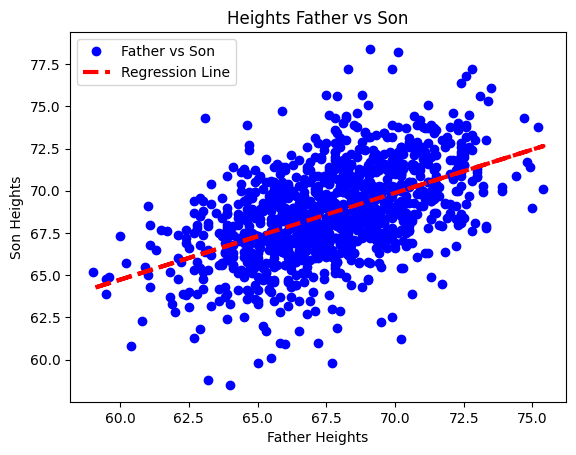

<Figure size 1000x1000 with 0 Axes>

In [14]:
#
# this is the same as before but here we also draw in red the linear regression line
fig, ax = plt.subplots()
plt.title("Heights Father vs Son")
plt.xlabel("Father Heights")
plt.ylabel("Son Heights")
plt.figure(figsize=(10,10))
print(f"Average Fathers Height: {x_mean}")
print(f"Average Fathers Height: {y_mean}")
print(f"The standard deviation of the Heights for the fathers is: {x_values.std()}")
print(f"The standard deviation of the Heights for the fathers is: {y_values.std()}")
#
# numpy will run a data fit a on polynomial of degree 1 (i.e. a line)
(m, b) = np.polyfit(x_values, y_values, 1)
print(f"The coefficient of the regression line is: {m}")
print(f"The intercept of the regression line is: {b}")
# 
# Here we create a function that that will take in: x and returns an estimate for y
# poly1d_fn is the name we give to the function
poly1d_fn = np.poly1d((m, b)) 
#
#
ax.plot(x_values,y_values, 'bo',                            # first set of data using 'bo': blue dots
         x_values, poly1d_fn(x_values), '--r', linewidth=3) # second set of data using '--k'=black dashed line
ax.legend(['Father vs Son', 'Regression Line'])
plt.show()

In [9]:
# Another wasy to ger regression parameter (also follow up exercise)
#
# METHOD 1
print("------ Alternative ways to get linear regression values using Exercise 1 data")
Xs = np.array([0.0339, 0.0423, 0.213, 0.257, 0.273, 0.273, 0.450, 0.503, 0.503, 0.637, 0.805, 0.904, 0.904, 0.910, 0.910, 1.02, 1.11, 1.11, 1.41, 1.72, 2.03, 2.02, 2.02, 2.02])
Ys = np.array([-19.3, 30.4, 38.7, 5.52, -33.1, -77.3, 398.0, 406.0, 436.0, 320.0, 373.0, 93.9, 210.0, 423.0, 594.0, 829.0, 718.0, 561.0, 608.0, 1.04E3, 1.10E3, 840.0, 801.0, 519.0])
N = 24
print("\n\n1) Results on X_values, Y_values from scipy function linregress")
from scipy.stats import linregress
l = linregress(Xs,Ys)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")
#
# METHOD 2    
print("\n\n---------------------")
print("2) Results on X_values, Y_values from scipy function linregress")
import statsmodels.api as sm
model = sm.OLS(Ys, sm.add_constant(Xs))
results = model.fit()

print(results.params)
print(results.summary())    


------ Alternative ways to get linear regression values using Exercise 1 data


1) Results on X_values, Y_values from scipy function linregress
slope       : 447.87059914099837
intercept   : 13.610139085217043
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 61.89254821132255


---------------------
2) Results on X_values, Y_values from scipy function linregress
[ 13.61013909 447.87059914]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     52.36
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.99e-07
Time:                        09:12:01   Log-Likelihood:                -159.43
No. Observations:                  24   AIC:                             322.9
Df Residuals:       

In [10]:
l = linregress(Xs,Ys)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")
print("---------")

l = linregress(Ys,Xs)
for i,value in enumerate(l):
    # tis gets the name of the field based on the index and the matching value
    print(f"{l._fields[i]:12}: {value}")


slope       : 447.87059914099837
intercept   : 13.610139085217043
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 61.89254821132255
---------
slope       : 0.0015722304620192293
intercept   : 0.25075620133153076
rvalue      : 0.8391399162310663
pvalue      : 2.994565602899751e-07
stderr      : 0.0002172711266523664


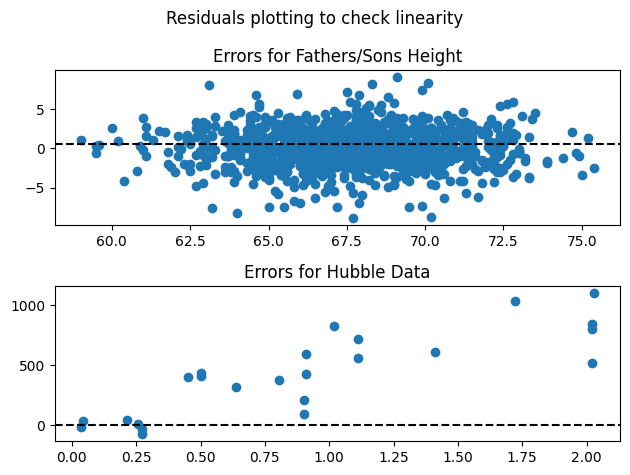

<Figure size 1500x1000 with 0 Axes>

In [37]:
#
#  PLOTTING THE RESIDUALS TO CHECK IF LINEARITY ACTUALLY APPLIES
#
# IF  LINEARITY APPLIES THE RESIDUALS E_i =  Y_i - hatY_i should be spread around zero and exhibit no pattern
#

#
# this is the same as before but here we also draw in red the linear regression line
fig, axs = plt.subplots(2)
fig.suptitle("Residuals plotting to check linearity")
plt.figure(figsize=(15,10))
#
####################################### SUBPLOT 1
#
# From before, we found the coefficient of the regression line for the fathers/son heaights as the tuple (m,b) 
# and the function to get the predicted value hat_y as poly1d_fn
# (m, b) = np.polyfit(x_values, y_values, 1)
# poly1d_fn = np.poly1d((m, b)) 
# 
# Errors are given by
errors = y_values - poly1d_fn(x_values)
axs[0].scatter(x_values,errors)
axs[0].set_title("Errors for Fathers/Sons Height")
axs[0].axhline(y=0.5, color='black', linestyle='--')
#
#
####################################### SUBPLOT 2
#
# The data here comes from the Hubble exercise
# 
# Data is in Xs,Ys
# the slope and intercept are the first 2 values of the object: l
slope = l[0]
intercept = l[1]

exercise_errors = [ x[1] - (slope*x[0] + intercept) for x in zip(Xs,Ys) ]
#
#
axs[1].scatter(Xs,exercise_errors) 
axs[1].set_title("Errors for Hubble Data")
axs[1].axhline(y=0.5, color='black', linestyle='--')

fig.tight_layout()
plt.show()

----------------------------------
The corelation coefficient is:  0.9888323018726735

This is actually very very high! but is the data linear? check the residual plot!
Slope:  6.108701317117372
Intercept:  -12.50372446171874


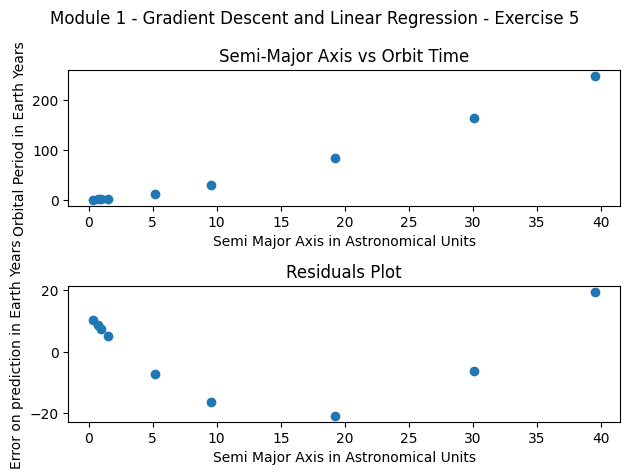

<Figure size 1000x1000 with 0 Axes>

-------------------------------- QQ PLOTs for X and Y


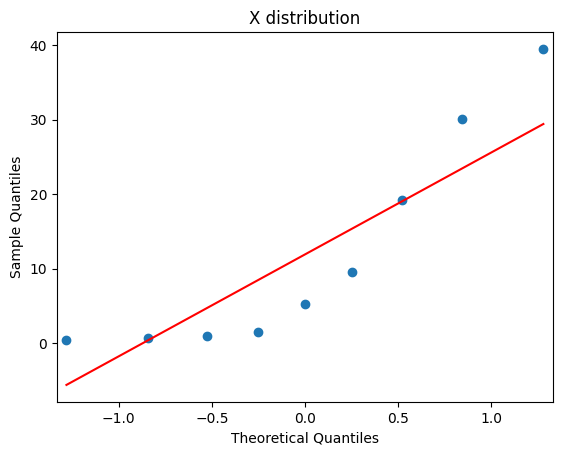

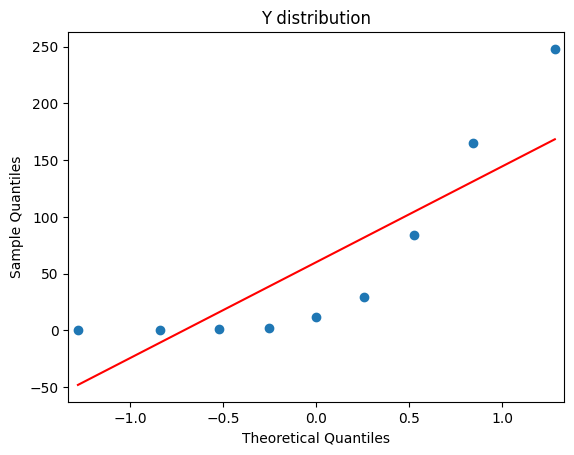

----------------------------Question 4
Slope is  0.15943483693978164
Intercept is  0.2829631808567219
-----------------------------
Slope is  42.85582249504597
Intercept is  -2.0698990460800246
-----------------------------
Slope is  1.4995325773381893
Intercept is  0.0013370447605036695
-----------------------------
Slope is  1333.1363800630938
Intercept is  -5118.9327939290815
-----------------------------


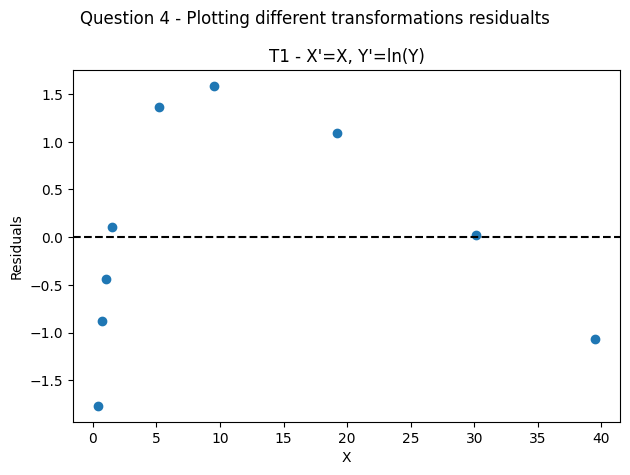

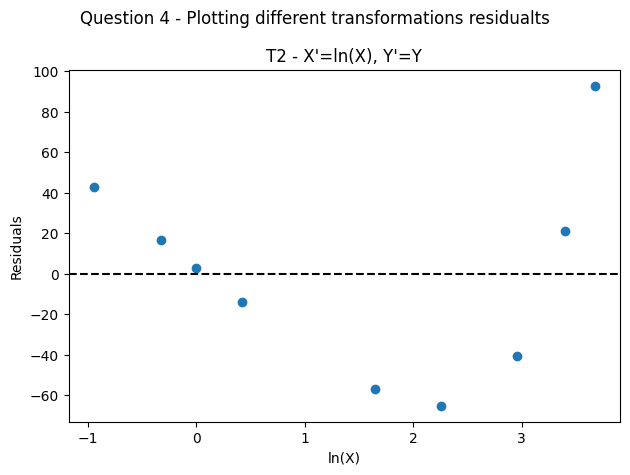

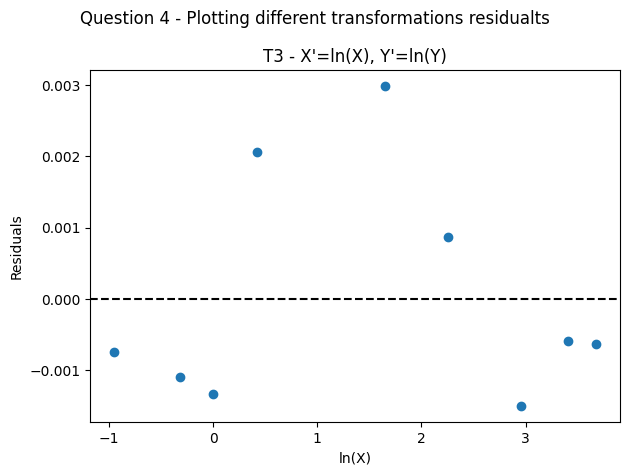

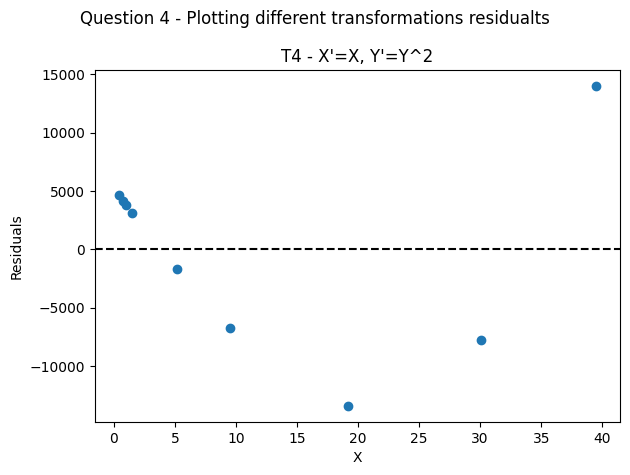

In [81]:
#
# Section 5 Exercise
#
# Xs are the semi-major axis of each planet's orbit around the Sun
# A planetary orbit is elliptical in shape, and the semi-major axis is the longer of the two axes 
# that define the ellipse. 
# When the ellipse is nearly circular (which is true for most planets), the semi-major axis is approximately 
# the radius of said circle. 
# The  values are measured in units of Astronomical Units (AU). 
# One AU is very close to the average distance between the Sun and Earth (defined as 149597870700 meters)
# hence, the Earth's semi-major axis is essentially 1 AU due to its very circular orbit.
Xs = np.array([ 0.387, 0.723, 1.00, 1.52, 5.20, 9.54, 19.2, 30.1, 39.5 ])
# 
# The Y values are the orbital period of the planet, measured in Earth years Y=1 (365.25 days), so Earth also has a  year.
Ys = np.array([ 0.241, 0.615, 1.00, 1.88, 11.9, 29.5, 84.0, 165.0, 248 ])
N = 9
fig, axs = plt.subplots(2)
fig.suptitle("Module 1 - Gradient Descent and Linear Regression - Exercise 5")
plt.figure(figsize=(10,10))

axs[0].scatter(Xs,Ys)
axs[0].set_title("Semi-Major Axis vs Orbit Time")
axs[0].set(xlabel="Semi Major Axis in Astronomical Units", ylabel="Orbital Period in Earth Years")
#
# Question 1
print("----------------------------------")
print("The corelation coefficient is: ",pearsonr(Xs, Ys)[0])
print("\nThis is actually very very high! but is the data linear? check the residual plot!")
#
# Question 2 Plot residuals
# we need first to find the regression line
# linregress comes from scipy (as a reminder)
(slope,intercept,_,_,_) = linregress(Xs,Ys)
print("Slope: ",slope)
print("Intercept: ",intercept)
residuals = Ys - ( slope * Xs + intercept )
axs[1].scatter(Xs,residuals)
axs[1].set_title("Residuals Plot")
axs[1].set(xlabel="Semi Major Axis in Astronomical Units", ylabel="Error on prediction in Earth Years")
#
#
fig.tight_layout()
plt.show()
#
# Question 3
print("-------------------------------- QQ PLOTs for X and Y")
import statsmodels.api as sm
sm.qqplot(Xs, line='s')
plt.title("X distribution")
plt.show()

sm.qqplot(Ys, line='s')
plt.title("Y distribution")
plt.show()
#
# Question 4 Find a better fit for the data
# Here we plot 4 different transformations
# 1) X' = X,       Y' = ln(Y)
# 2) X' = ln(X),   Y' = Y
# 3) X' = ln(X)    Y' = ln(Y)
# 4) X' = X,       Y' = Y^2
print("----------------------------Question 4")
x_labels = ['X', 'ln(X)', 'ln(X)', 'X']
titles = [
            "X'=X, Y'=ln(Y)",
            "X'=ln(X), Y'=Y",
            "X'=ln(X), Y'=ln(Y)",
            "X'=X, Y'=Y^2"          
          ]
X_datasets = [ Xs, np.log(Xs), np.log(Xs), Xs ]
Y_datasets = [ np.log(Ys), Ys, np.log(Ys), np.square(Ys) ]
#
# Now we
# - compute the linear regression parameters for the different transformations
# - Find the residuals
# - Plot them (I gve up creating nice subplots.. brutally priting a plot for each transformation here)
for index,(X_data,Y_data) in enumerate(zip(X_datasets,Y_datasets)):
    fig, axs = plt.subplots(1)
    fig.suptitle("Question 4 - Plotting different transformations residualts")
    plt.figure(figsize=(8,8))    
    (slope,intercept,_,_,_) = linregress(X_data,Y_data)
    residuals = Y_data - ( slope * X_data + intercept )
    axs.scatter(X_data,residuals);
    axs.set_title(f"T{index+1} - {titles[index]}")
    axs.axhline(y=0.0, color='black', linestyle='--')
    axs.set(xlabel=x_labels[index], ylabel='Residuals')    
    fig.tight_layout()
    plt.close()  # <-- this is like plt.show() but it does not print other matplotlib output
    print("Slope is ",slope)
    print("Intercept is ",intercept)
    print("-----------------------------")



In [116]:
#
#  Exercise Tab 6. Multiple linear regression
#
# LogPlanetMass is the logarithm of the observed exoplanet's mass in units of Jupiter's mass. 
# A LogPlanetMass of zero is an exoplanet with the same mass as Jupiter. Jupiter is used as a convenient comparison, 
# as large gas giants are the most easily detected, and thus most commonly observed, kind of exoplanet. 
LogPlanetMass = np.array([-0.31471074,  1.01160091,  0.58778666,  0.46373402, -0.01005034,
         0.66577598, -1.30933332, -0.37106368, -0.40047757, -0.27443685,
         1.30833282, -0.46840491, -1.91054301,  0.16551444,  0.78845736,
        -2.43041846,  0.21511138,  2.29253476, -2.05330607, -0.43078292,
        -4.98204784, -0.48776035, -1.69298258, -0.08664781, -2.28278247,
         3.30431931, -3.27016912,  1.14644962, -3.10109279, -0.61248928])
#
# LogPlanetRadius is the logarithm of the observed exoplanet's radius in units of Jupiter's radius, for much the same reason. 
LogPlanetRadius = np.array([ 0.32497786,  0.34712953,  0.14842001,  0.45742485,  0.1889661 ,
         0.06952606,  0.07696104,  0.3220835 ,  0.42918163, -0.05762911,
         0.40546511,  0.19227189, -0.16251893,  0.45107562,  0.3825376 ,
        -0.82098055,  0.10436002,  0.0295588 , -1.17921515,  0.55961579,
        -2.49253568,  0.11243543, -0.72037861,  0.36464311, -0.46203546,
         0.13976194, -2.70306266,  0.12221763, -2.41374014,  0.35627486])
#
# LogPlanetOrbit is the logarithm of the observed planet's semi-major axis of orbit, in units of AU. 
LogPlanetOrbit = np.array([-2.63108916, -3.89026151, -3.13752628, -2.99633245, -3.12356565,
        -2.33924908, -2.8507665 , -3.04765735, -2.84043939, -3.19004544,
        -3.14655516, -3.13729584, -3.09887303, -3.09004295, -3.16296819,
        -2.3227878 , -3.77661837, -2.52572864, -4.13641734, -3.05018846,
        -2.40141145, -3.14795149, -0.40361682, -3.2148838 , -2.74575207,
        -3.70014265, -1.98923527, -3.35440922, -1.96897409, -2.99773428])
#
# StarMetallicity is the relative amount of metals observed in the parent star. It is equal to the logarithm of the ratio of the 
# observed abundance of metal to the observed abundance of metal in the Sun. The Sun is a quite average star, so it serves as a 
# good reference point. 
# The most common metal to measure is Iron, but astronomers define any element that isn't Hydrogen or Helium as a metal. 
StarMetallicity = np.array([ 0.11 , -0.002, -0.4  ,  0.01 ,  0.15 ,  0.22 , -0.01 ,  0.02 ,
        -0.06 , -0.127,  0.   ,  0.12 ,  0.27 ,  0.09 , -0.077,  0.3  ,
         0.14 , -0.07 ,  0.19 , -0.02 ,  0.12 ,  0.251,  0.07 ,  0.16 ,
         0.19 ,  0.052, -0.32 ,  0.258,  0.02 , -0.17 ])
#
# LogStarMass is the logarithm of the parent star's mass in units of the Sun's mass. 
LogStarMass = np.array([ 0.27002714,  0.19144646, -0.16369609,  0.44468582,  0.19227189,
         0.01291623,  0.0861777 ,  0.1380213 ,  0.49469624, -0.43850496,
         0.54232429,  0.02469261,  0.07325046,  0.42133846,  0.2592826 ,
        -0.09431068, -0.24846136, -0.12783337, -0.07364654,  0.26159474,
         0.07603469, -0.07796154,  0.09440068,  0.07510747,  0.17395331,
         0.28893129, -0.21940057,  0.02566775, -0.09211529,  0.16551444])
#
# LogStarAge is the logarithm of the parent star's age in giga-years.
LogStarAge = np.array([ 1.58103844,  1.06471074,  2.39789527,  0.72754861,  0.55675456,
         1.91692261,  1.64865863,  1.38629436,  0.77472717,  1.36097655,
         0.        ,  1.80828877,  1.7837273 ,  0.64185389,  0.69813472,
         2.39789527, -0.35667494,  1.79175947,  1.90210753,  1.39624469,
         1.84054963,  2.19722458,  1.89761986,  1.84054963,  0.74193734,
         0.55961579,  1.79175947,  0.91629073,  2.17475172,  1.36097655])

N = 30
#
# Y is the vector LogPlanet Mass
# Here we need to define the desugn matrix X of the datapoints keeping the following order:
#
# # LogPlanetRadius, LogPlanetOrbit, StarMetallicity, LogStarMass, LogStarAge
#
# To do that, the first thing to do is reshape the vectors in Nx1 matrices with reshapes and the concatenate them
# Note: we know the length is always 30 so use that
vectors_list = [ np.ones((N,1),int),
                LogPlanetRadius.reshape(N,1), 
                 LogPlanetOrbit.reshape(N,1), 
                 StarMetallicity.reshape(N,1), 
                 LogStarMass.reshape(N,1), 
                 LogStarAge.reshape(N,1)    
                 ]

X_matrix = np.concatenate(vectors_list,axis=1)
#
# This assert checks that all the values in the first row are correct
assert all(X_matrix[0,:] ==  np.array([1, 0.32497786, -2.63108916, 0.11, 0.27002714, 1.58103844]))
#
# we can find the Parameters vector Beta using the Matrix operations from: Hat_Beta = (X_transponse * X)^(-1) * X_stranspose * Y
m1 = np.matmul(X_matrix.T,X_matrix)
m2 = np.linalg.inv(m1)
m3 = np.matmul(m2,X_matrix.T)
Beta = np.matmul(m3,LogPlanetMass.reshape(N,1)).flatten()

print("The parameter vector found Beta is:\n", Beta)
#
# Now we find using a library module:
print("--------------")
print("\n\nNow we find hopefully the same data using a library module from statsmodels..")
from statsmodels.api import OLS # Ordinray Linear Regression
model = OLS(LogPlanetMass, X_matrix)
result = model.fit()
print("\nParameters found are: ", result.params)
print("\nThis library also has a nice summary:\n\n")
print(result.summary())

The parameter vector found Beta is:
 [ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]
--------------


Now we find hopefully the same data using a library module from statsmodels..

Parameters found are:  [ 0.15379303  1.40214538 -0.14099818 -1.59951364 -0.95610919 -0.46176234]

This library also has a nice summary:


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     9.264
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.14e-05
Time:                        15:40:55   Log-Likelihood:                -42.078
No. Observations:                  30   AIC:                             96.16
Df Residuals:                      24   BIC:                             104.6
Df Model:              

In [138]:
#
# MODEL SELECTION
# 
# We now want to determine what features are relevant to the model
# In our assumption os a Gaussian Noise with zero mean Beta_hat can be seen as a Gaussian random variables with mean Beta
# and coavariance matrix of Beta  given by (sigma^2) * (X_transpose * X )^(-1)
# Beta_hat is also an unbiased estimator so we can do Z/T Tests 
# 
# As we don't know sigma^2 we need an estimator and we use
#                                                        1          N    
#                                    sigma_hat^2 =   ---------   Sum  (Y_i - X_i*Beta_hat)^2
#                                                      N - p        i=1   
# where p is the number of feature and N is the number of datapoints
#
# First, estimate the standard deviation of the noise.
Ys = LogPlanetMass.reshape(N,1)
sigmaHat = np.sqrt( 
                    np.sum( 
                            np.square(Ys - X_matrix.dot(Beta) )     # Note: matrix1.dot(matrix2) is the same as np.matmul(matrix1,matrix2)
                          ) / ( N - X_matrix.shape[1] ) 
                   )
print("Sgima_at = ",sigmaHat)
#
# Now estimate the (matrix part of the) covariance matrix for beta 
#
# The covariance matrix is given by sigma^2 * (X_transpose * X)^(-1) 
# Here we only get the matrix values (this is a pxp matrix)
betaCov = np.linalg.inv(X_matrix.T.dot(X_matrix))
print("betaCov diagonal: ",betaCov.diagonal())
#
# Use the formula for the t-test statistic for each variable
tVals = Beta/(sigmaHat * np.sqrt(np.diagonal(betaCov)))
print("Values for T-test: ",tVals)
#
# Calculate the 2-sided p-values.
# 
# the survival function is 1 - CDF(x) of a distribution
# so it's useful to compute the p-value of X > x
from scipy.stats import t
pvals = t.sf(np.abs(tVals), N-X_matrix.shape[1])*2
print("The p-values are: ", pvals)
print("\n\nNote: these p-values are very different from the ones we got from the OLS Orindary Linear Regression object summary above and also below")
print(result.pvalues)


Sgima_at =  13.280909564940373
betaCov diagonal:  [1.59476182 0.06783393 0.10700326 1.2927027  1.03121648 0.11411451]
Values for T-test:  [ 0.00916982  0.40536078 -0.03245542 -0.10592801 -0.07089323 -0.10292485]
The p-values are:  [0.99275944 0.68880323 0.97437728 0.91651989 0.94407018 0.91887781]


Note: these p-values are very different from the ones we got from the OLS Orindary Linear Regression object summary above and also below
[9.12757006e-01 5.43077387e-05 6.98598654e-01 2.13109749e-01
 4.00456619e-01 2.25952781e-01]
